In [1]:
import pandas as pd
import numpy as np

from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Dress_Style.xlsx")
df.fillna('Blank', inplace=True)
df['rating_decile'] = pd.qcut(df['Rating'], 10, labels = False, duplicates = 'drop')
df.head(2)

,Price,Season,NeckLine,SleeveLength,waistline,Material,FabricType,Decoration,Pattern Type,Rating,rating_decile
0,Low,Summer,o-neck,sleevless,empire,Blank,chiffon,ruffles,animal,4.6,2
1,Low,Summer,o-neck,Petal,natural,microfiber,Blank,ruffles,animal,0.0,0


In [3]:
cluster_cols = ['Price', 'Season', 'NeckLine', 'SleeveLength', 'waistline', 'Material', 
                'FabricType', 'Decoration', 'Pattern Type', 'rating_decile']

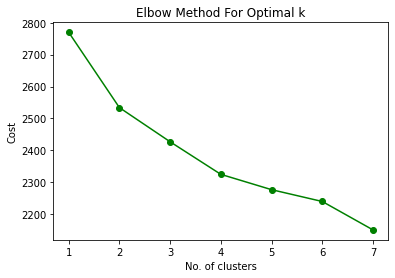

In [4]:
cost = []
K = range(1, 8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0) # We can set verbose 1 to get details
    kmode.fit_predict(df[cluster_cols])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'go-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
# Using Elbow method, we can take number of cluster at 4, and divide data into 4 cluster
kmode = KModes(n_clusters=4, init = "random", n_init = 5, max_iter=1000, verbose=0) # We can set verbose 1 to get details
df['cluster'] = kmode.fit_predict(df[cluster_cols])

In [6]:
df['cluster'].value_counts()

0    200
1    119
2    106
3     75
Name: cluster, dtype: int64